# Twitter Sentiment Analysis - NLP Project

## Dataset:
- Training data: 74,682 tweets
- Validation data: 1,758 tweets

## Steps:
1. Load Training & Validation Data
2. Exploratory Data Analysis (EDA)
3. Text Preprocessing with NLTK
4. Train 3 Classification Models
5. Evaluate on Validation Set
6. Compare & Save Best Model

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle

# NLTK for NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


## 2. Load Training & Validation Datasets

In [2]:
# Load training data
train_df = pd.read_csv('data/twitter_training.csv', header=None)
train_df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']

print(f"Training Data Shape: {train_df.shape}")
print("\nFirst 5 rows of training data:")
train_df.head()

Training Data Shape: (74682, 4)

First 5 rows of training data:


,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
# Load validation data
val_df = pd.read_csv('data/twitter_validation.csv', header=None)
val_df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']

print(f"Validation Data Shape: {val_df.shape}")
print("\nFirst 5 rows of validation data:")
val_df.head()

Validation Data Shape: (1000, 4)

First 5 rows of validation data:


,Tweet_ID,Entity,Sentiment,Tweet_Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


## 3. Exploratory Data Analysis (EDA)

In [4]:
# Check dataset info
print("Training Dataset Info:")
print("="*60)
print(train_df.info())

print("\n\nValidation Dataset Info:")
print("="*60)
print(val_df.info())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


Validation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       1000 non-null   int64 
 1   Entity         1000 non-null   object
 2   Sentiment      1000 non-null   object
 3   Tweet_Content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
None


In [5]:
# Check for missing values
print("Missing values in Training Data:")
print(train_df.isnull().sum())

print("\nMissing values in Validation Data:")
print(val_df.isnull().sum())

# Remove missing values
train_df = train_df.dropna()
val_df = val_df.dropna()

print(f"\nTraining data after cleaning: {train_df.shape}")
print(f"Validation data after cleaning: {val_df.shape}")

Missing values in Training Data:
Tweet_ID           0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64

Missing values in Validation Data:
Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

Training data after cleaning: (73996, 4)
Validation data after cleaning: (1000, 4)


In [6]:
# Check Duplicates

train_df[train_df.duplicated()]

,Tweet_ID,Entity,Sentiment,Tweet_Content
20,2404,Borderlands,Positive,that was the first borderlands session in a lo...
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
51,2409,Borderlands,Neutral,Blaming Sight for Tardiness! A little bit of b...
64,2411,Borderlands,Neutral,.. [
146,2425,Borderlands,Negative,"""What a bitch!"""
...,...,...,...,...
74505,9171,Nvidia,Neutral,This benchmarking comparison between Oculus Qu...
74510,9172,Nvidia,Positive,@ NVIDIAGeForce @ nvidia
74589,9185,Nvidia,Neutral,Heard people are having issues with ordering t...
74619,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...


In [7]:
val_df[val_df.duplicated()]

,Tweet_ID,Entity,Sentiment,Tweet_Content


In [8]:
#Drop Duplicates
train_df = train_df.drop_duplicates()

In [9]:
# Sentiment distribution in training data
print("Training Data - Sentiment Distribution:")
print("="*60)
print(train_df['Sentiment'].value_counts())
print("\nPercentages:")
print(train_df['Sentiment'].value_counts(normalize=True) * 100)

print("\n\nValidation Data - Sentiment Distribution:")
print("="*60)
print(val_df['Sentiment'].value_counts())
print("\nPercentages:")
print(val_df['Sentiment'].value_counts(normalize=True) * 100)

Training Data - Sentiment Distribution:
Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

Percentages:
Sentiment
Negative      30.280786
Positive      27.510606
Neutral       24.712515
Irrelevant    17.496092
Name: proportion, dtype: float64


Validation Data - Sentiment Distribution:
Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

Percentages:
Sentiment
Neutral       28.5
Positive      27.7
Negative      26.6
Irrelevant    17.2
Name: proportion, dtype: float64


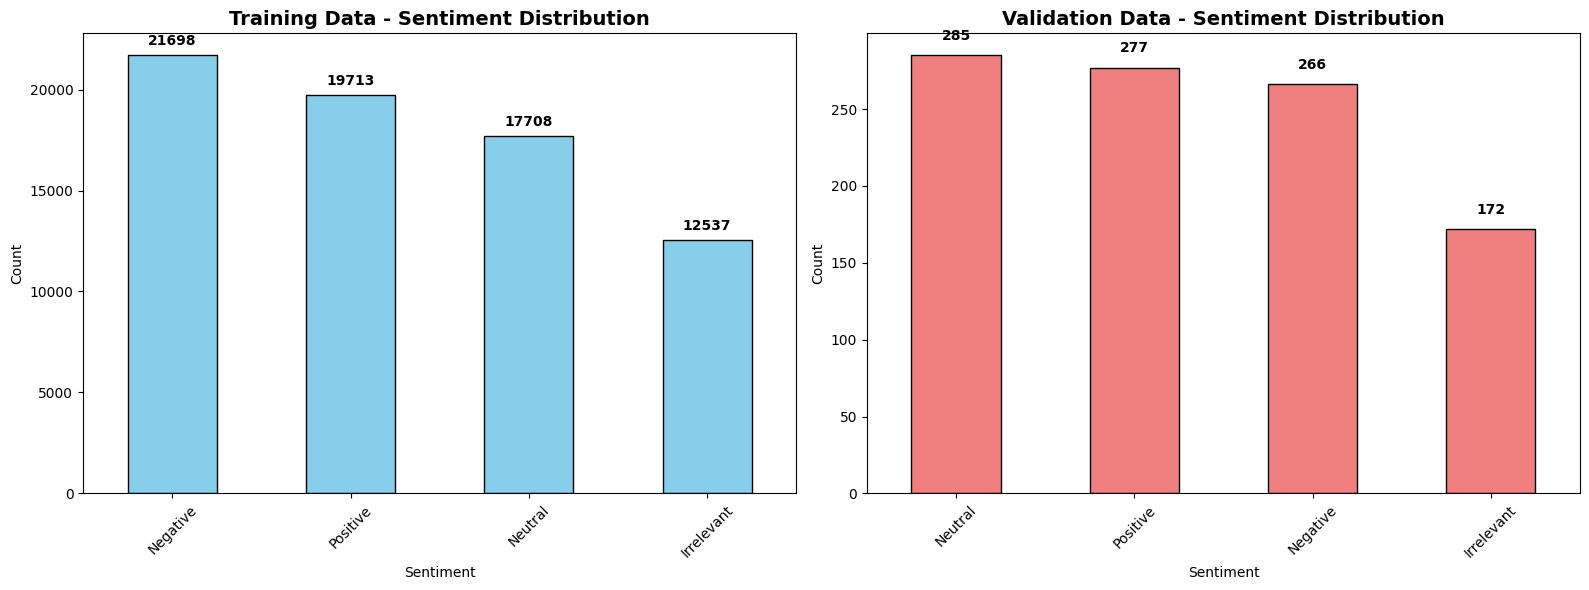

In [10]:
# Visualize sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training data distribution
train_df['Sentiment'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Training Data - Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(train_df['Sentiment'].value_counts()):
    axes[0].text(i, v + 500, str(v), ha='center', fontweight='bold')

# Validation data distribution
val_df['Sentiment'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title('Validation Data - Sentiment Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(val_df['Sentiment'].value_counts()):
    axes[1].text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [11]:
# Sample tweets by sentiment
print("Sample Tweets from Training Data:")
print("="*80)
for sentiment in train_df['Sentiment'].unique():
    print(f"\n{sentiment}:")
    sample = train_df[train_df['Sentiment'] == sentiment]['Tweet_Content'].iloc[0]
    print(sample)
    print("-"*80)

Sample Tweets from Training Data:

Positive:
im getting on borderlands and i will murder you all ,
--------------------------------------------------------------------------------

Neutral:
Rock-Hard La Varlope, RARE & POWERFUL, HANDSOME JACKPOT, Borderlands 3 (Xbox) dlvr.it/RMTrgF  
--------------------------------------------------------------------------------

Negative:
the biggest dissappoinment in my life came out a year ago fuck borderlands 3
--------------------------------------------------------------------------------

Irrelevant:
Appreciate the (sonic) concepts / praxis Valenzuela and Landa-Posas thread together in this talk: multimodal listening, soundwalks, borderlands frameworks, participatory action research, and testimonios. . . So many thoughtful and resonant intersections here.. .  
--------------------------------------------------------------------------------


## 4. Text Preprocessing with NLTK

NLP preprocessing steps:
- Lowercase conversion
- Remove URLs, mentions, hashtags
- Remove special characters and numbers
- Remove stopwords (using NLTK)
- Lemmatization (using NLTK)

In [12]:
# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Clean and preprocess text using NLP techniques
    """
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize and process
    words = text.split()
    
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

print("✅ Text preprocessing function created!")

✅ Text preprocessing function created!


In [13]:
# Test preprocessing on sample tweets
print("Before and After Preprocessing Examples:")
print("="*80)
for i in range(3):
    original = train_df['Tweet_Content'].iloc[i]
    cleaned = clean_text(original)
    print(f"\nExample {i+1}:")
    print(f"Original: {original}")
    print(f"Cleaned : {cleaned}")
    print("-"*80)

Before and After Preprocessing Examples:

Example 1:
Original: im getting on borderlands and i will murder you all ,
Cleaned : im getting borderland murder
--------------------------------------------------------------------------------

Example 2:
Original: I am coming to the borders and I will kill you all,
Cleaned : coming border kill
--------------------------------------------------------------------------------

Example 3:
Original: im getting on borderlands and i will kill you all,
Cleaned : im getting borderland kill
--------------------------------------------------------------------------------


In [14]:
# Apply preprocessing to training data
print("Preprocessing training data...")
train_df['Cleaned_Tweet'] = train_df['Tweet_Content'].apply(clean_text)
train_df = train_df[train_df['Cleaned_Tweet'].str.len() > 0]
print(f"✅ Training data preprocessed! Shape: {train_df.shape}")

# Apply preprocessing to validation data
print("\nPreprocessing validation data...")
val_df['Cleaned_Tweet'] = val_df['Tweet_Content'].apply(clean_text)
val_df = val_df[val_df['Cleaned_Tweet'].str.len() > 0]
print(f"✅ Validation data preprocessed! Shape: {val_df.shape}")

Preprocessing training data...
✅ Training data preprocessed! Shape: (69993, 5)

Preprocessing validation data...
✅ Validation data preprocessed! Shape: (999, 5)


## 5. Prepare Data for Modeling

In [15]:
# Prepare training data
X_train = train_df['Cleaned_Tweet']
y_train = train_df['Sentiment']

# Prepare validation data
X_val = val_df['Cleaned_Tweet']
y_val = val_df['Sentiment']

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"\nTraining sentiment distribution:")
print(y_train.value_counts())

Training samples: 69993
Validation samples: 999

Training sentiment distribution:
Sentiment
Negative      21245
Positive      19220
Neutral       17249
Irrelevant    12279
Name: count, dtype: int64


In [16]:
# Convert text to numbers using TF-IDF
print("Converting text to TF-IDF features...")
vectorizer = TfidfVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

print(f"\n✅ Vectorization complete!")
print(f"Training feature matrix shape: {X_train_vec.shape}")
print(f"Validation feature matrix shape: {X_val_vec.shape}")
print(f"Number of features: {len(vectorizer.get_feature_names_out())}")

Converting text to TF-IDF features...

✅ Vectorization complete!
Training feature matrix shape: (69993, 5000)
Validation feature matrix shape: (999, 5000)
Number of features: 5000


## 6. Train & Evaluate Models

We'll train 3 models and evaluate on the validation set

### Model 1: Naive Bayes

In [17]:
print("Training Naive Bayes...")
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Predict on training data
nb_train_pred = nb_model.predict(X_train_vec)
nb_train_acc = accuracy_score(y_train, nb_train_pred)

# Predict on validation data
nb_val_pred = nb_model.predict(X_val_vec)
nb_val_acc = accuracy_score(y_val, nb_val_pred)

print("\n" + "="*70)
print("NAIVE BAYES RESULTS")
print("="*70)
print(f"Training Accuracy: {nb_train_acc:.4f} ({nb_train_acc*100:.2f}%)")
print(f"Validation Accuracy: {nb_val_acc:.4f} ({nb_val_acc*100:.2f}%)")
print("\nValidation Set - Classification Report:")
print(classification_report(y_val, nb_val_pred))

Training Naive Bayes...

NAIVE BAYES RESULTS
Training Accuracy: 0.6786 (67.86%)
Validation Accuracy: 0.6977 (69.77%)

Validation Set - Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.78      0.52      0.62       172
    Negative       0.63      0.83      0.72       265
     Neutral       0.78      0.56      0.65       285
    Positive       0.69      0.82      0.75       277

    accuracy                           0.70       999
   macro avg       0.72      0.68      0.69       999
weighted avg       0.72      0.70      0.69       999



### Model 2: Logistic Regression

In [18]:
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_vec, y_train)

# Predict on training data
lr_train_pred = lr_model.predict(X_train_vec)
lr_train_acc = accuracy_score(y_train, lr_train_pred)

# Predict on validation data
lr_val_pred = lr_model.predict(X_val_vec)
lr_val_acc = accuracy_score(y_val, lr_val_pred)

print("\n" + "="*70)
print("LOGISTIC REGRESSION RESULTS")
print("="*70)
print(f"Training Accuracy: {lr_train_acc:.4f} ({lr_train_acc*100:.2f}%)")
print(f"Validation Accuracy: {lr_val_acc:.4f} ({lr_val_acc*100:.2f}%)")
print("\nValidation Set - Classification Report:")
print(classification_report(y_val, lr_val_pred))

Training Logistic Regression...

LOGISTIC REGRESSION RESULTS
Training Accuracy: 0.7449 (74.49%)
Validation Accuracy: 0.7998 (79.98%)

Validation Set - Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.76      0.72      0.74       172
    Negative       0.77      0.87      0.82       265
     Neutral       0.86      0.73      0.79       285
    Positive       0.80      0.85      0.83       277

    accuracy                           0.80       999
   macro avg       0.80      0.79      0.79       999
weighted avg       0.80      0.80      0.80       999



### Model 3: Random Forest Classifier

In [19]:
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_vec, y_train)

# Predict on training data
rf_train_pred = rf_model.predict(X_train_vec)
rf_train_acc = accuracy_score(y_train, rf_train_pred)

# Predict on validation data
rf_val_pred = rf_model.predict(X_val_vec)
rf_val_acc = accuracy_score(y_val, rf_val_pred)

print("\n" + "="*70)
print("RANDOM FOREST RESULTS")
print("="*70)
print(f"Training Accuracy: {rf_train_acc:.4f} ({rf_train_acc*100:.2f}%)")
print(f"Validation Accuracy: {rf_val_acc:.4f} ({rf_val_acc*100:.2f}%)")
print("\nValidation Set - Classification Report:")
print(classification_report(y_val, rf_val_pred))

Training Random Forest Classifier...

RANDOM FOREST RESULTS
Training Accuracy: 0.9776 (97.76%)
Validation Accuracy: 0.9670 (96.70%)

Validation Set - Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.98      0.97      0.97       172
    Negative       0.97      0.97      0.97       265
     Neutral       0.98      0.95      0.97       285
    Positive       0.94      0.98      0.96       277

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



## 7. Compare Models

In [20]:
# Create comparison dataframe
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'Random Forest'],
    'Training Accuracy': [nb_train_acc, lr_train_acc, rf_train_acc],
    'Validation Accuracy': [nb_val_acc, lr_val_acc, rf_val_acc]
}).round(4)

print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)
print(results.to_string(index=False))

# Find best model based on validation accuracy
best_idx = results['Validation Accuracy'].idxmax()
best_model_name = results.loc[best_idx, 'Model']
best_val_acc = results.loc[best_idx, 'Validation Accuracy']

print("\n" + "="*70)
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"🎯 VALIDATION ACCURACY: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print("="*70)


MODEL COMPARISON
              Model  Training Accuracy  Validation Accuracy
        Naive Bayes             0.6786               0.6977
Logistic Regression             0.7449               0.7998
      Random Forest             0.9776               0.9670

🏆 BEST MODEL: Random Forest
🎯 VALIDATION ACCURACY: 0.9670 (96.70%)


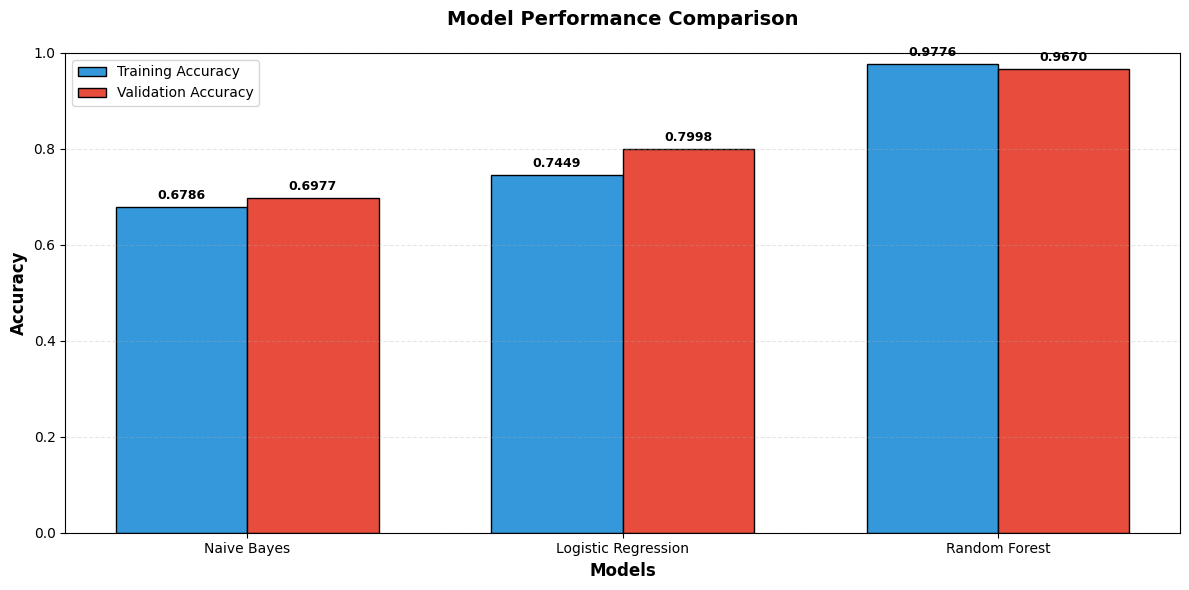

In [21]:
# Visualize model comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(results['Model']))
width = 0.35

bars1 = ax.bar(x - width/2, results['Training Accuracy'], width, 
               label='Training Accuracy', color='#3498db', edgecolor='black')
bars2 = ax.bar(x + width/2, results['Validation Accuracy'], width, 
               label='Validation Accuracy', color='#e74c3c', edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(results['Model'])
ax.legend(fontsize=10)
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Confusion Matrix for Best Model

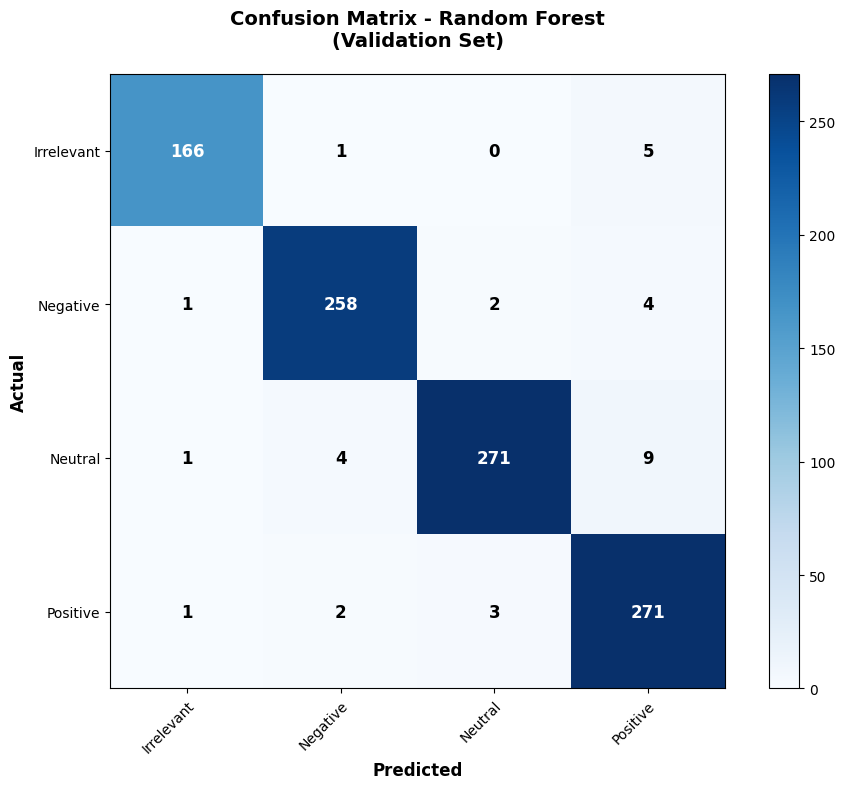

In [22]:
# Get predictions from best model
if best_model_name == 'Naive Bayes':
    best_model = nb_model
    best_pred = nb_val_pred
elif best_model_name == 'Logistic Regression':
    best_model = lr_model
    best_pred = lr_val_pred
else:
    best_model = rf_model
    best_pred = rf_val_pred

# Create confusion matrix
cm = confusion_matrix(y_val, best_pred)
labels = sorted(y_val.unique())

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm, cmap='Blues')

# Add labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", 
                      color="white" if cm[i, j] > cm.max() / 2 else "black",
                      fontsize=12, fontweight='bold')

ax.set_title(f'Confusion Matrix - {best_model_name}\n(Validation Set)', 
            fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Actual', fontsize=12, fontweight='bold')
ax.set_xlabel('Predicted', fontsize=12, fontweight='bold')

plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

## 9. Save Best Model & Vectorizer

In [23]:
# Save model
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("\n" + "="*70)
print("✅ FILES SAVED SUCCESSFULLY")
print("="*70)
print(f"Model: sentiment_model.pkl ({best_model_name})")
print(f"Vectorizer: vectorizer.pkl")
print(f"\nValidation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print("\nThese files are ready for the Streamlit app!")


✅ FILES SAVED SUCCESSFULLY
Model: sentiment_model.pkl (Random Forest)
Vectorizer: vectorizer.pkl

Validation Accuracy: 0.9670 (96.70%)

These files are ready for the Streamlit app!


## 10. Test Prediction Function

In [24]:
def predict_sentiment(text):
    """
    Predict sentiment for new text
    This function will be used in Streamlit app
    """
    # Clean text
    cleaned = clean_text(text)
    
    # Vectorize
    vectorized = vectorizer.transform([cleaned])
    
    # Predict
    prediction = best_model.predict(vectorized)[0]
    
    # Get probability if available
    if hasattr(best_model, 'predict_proba'):
        probabilities = best_model.predict_proba(vectorized)[0]
        confidence = dict(zip(best_model.classes_, probabilities))
    else:
        confidence = {prediction: 1.0}
    
    return prediction, confidence

print("✅ Prediction function created!")

✅ Prediction function created!


In [25]:
# Test predictions
test_tweets = [
    "I absolutely love this product! It's amazing and works perfectly!",
    "This is the worst experience ever. Terrible service and quality.",
    "The weather is nice today.",
    "Not sure how I feel about this new update.",
    "Outstanding performance! Highly recommended!"
]

print("\n" + "="*80)
print("TESTING PREDICTIONS ON NEW TWEETS")
print("="*80)

for i, tweet in enumerate(test_tweets, 1):
    sentiment, confidence = predict_sentiment(tweet)
    max_confidence = max(confidence.values())
    
    print(f"\nTest {i}:")
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment}")
    print(f"Confidence: {max_confidence:.4f} ({max_confidence*100:.2f}%)")
    print("-"*80)


TESTING PREDICTIONS ON NEW TWEETS

Test 1:
Tweet: I absolutely love this product! It's amazing and works perfectly!
Predicted Sentiment: Positive
Confidence: 0.6600 (66.00%)
--------------------------------------------------------------------------------

Test 2:
Tweet: This is the worst experience ever. Terrible service and quality.
Predicted Sentiment: Negative
Confidence: 0.7500 (75.00%)
--------------------------------------------------------------------------------

Test 3:
Tweet: The weather is nice today.
Predicted Sentiment: Positive
Confidence: 0.7825 (78.25%)
--------------------------------------------------------------------------------

Test 4:
Tweet: Not sure how I feel about this new update.
Predicted Sentiment: Positive
Confidence: 0.5136 (51.36%)
--------------------------------------------------------------------------------

Test 5:
Tweet: Outstanding performance! Highly recommended!
Predicted Sentiment: Positive
Confidence: 0.6358 (63.58%)
-------------------------

## 📊 Project Summary

### Dataset:
- ✅ Training data: 74,682 tweets
- ✅ Validation data: 1,758 tweets

### Preprocessing:
- ✅ Text cleaning (URLs, mentions, special chars)
- ✅ NLTK stopwords removal
- ✅ NLTK lemmatization
- ✅ TF-IDF vectorization (5000 features)

### Models Trained:
1. ✅ Naive Bayes
2. ✅ Logistic Regression
3. ✅ Random Forest Classifier

### Output Files:
- ✅ `sentiment_model.pkl` - Best model
- ✅ `vectorizer.pkl` - TF-IDF vectorizer

### Next Step:
🚀 **Build Streamlit App** with:
   1. Input page - Accept tweet text
   2. Prediction page - Display sentiment & confidence